In [1]:
from importdata import DOWNLOADS
from astropy.table import Table
import os
import matplotlib.pyplot as plt

decals_filename = 'decals-dr7.1-UKBOSS_best_ukwide_v5_2-02jun2015-match.fits'
mgc_filename = 'UKBOSS_best_ukwide_v5_2-02jun2015-match.fits'
decals_loc = os.path.join(DOWNLOADS, decals_filename)
mgc_loc = os.path.join(DOWNLOADS, mgc_filename)

# DECaLS catalog
decals = Table.read(decals_loc)[:10000]
# matched best_ukwide catalog
mgc = Table.read(mgc_loc)[:10000]

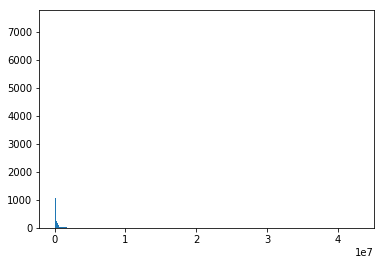

In [2]:
plt.hist(decals["DCHISQ"][:,3], bins=500);

In [6]:
import importdata
import MachineLearning as ML
import MLAnalysis as MLA
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import time

In [7]:
data = importdata.importdata(slice(None,100000))

/home/alan/local/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


In [3]:
data.columns.values

array(['RELEASE', 'OBJID', 'TYPE', 'RA', 'DEC', 'RA_IVAR', 'DEC_IVAR',
       'EBV', 'FLUX_U', 'FLUX_G', 'FLUX_R', 'FLUX_I', 'FLUX_Z', 'FLUX_Y',
       'FLUX_W1', 'FLUX_W2', 'FLUX_W3', 'FLUX_W4', 'FLUX_IVAR_U',
       'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_I', 'FLUX_IVAR_Z',
       'FLUX_IVAR_Y', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'FLUX_IVAR_W3',
       'FLUX_IVAR_W4', 'MW_TRANSMISSION_U', 'MW_TRANSMISSION_G',
       'MW_TRANSMISSION_R', 'MW_TRANSMISSION_I', 'MW_TRANSMISSION_Z',
       'MW_TRANSMISSION_Y', 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2',
       'MW_TRANSMISSION_W3', 'MW_TRANSMISSION_W4', 'NOBS_U', 'NOBS_G',
       'NOBS_R', 'NOBS_I', 'NOBS_Z', 'NOBS_Y', 'NOBS_W1', 'NOBS_W2',
       'NOBS_W3', 'NOBS_W4', 'RCHISQ_U', 'RCHISQ_G', 'RCHISQ_R',
       'RCHISQ_I', 'RCHISQ_Z', 'RCHISQ_Y', 'RCHISQ_W1', 'RCHISQ_W2',
       'RCHISQ_W3', 'RCHISQ_W4', 'FRACFLUX_U', 'FRACFLUX_G', 'FRACFLUX_R',
       'FRACFLUX_I', 'FRACFLUX_Z', 'FRACFLUX_Y', 'FRACFLUX_W1',
       'FRACFLUX_W2', 'FRACFLUX_

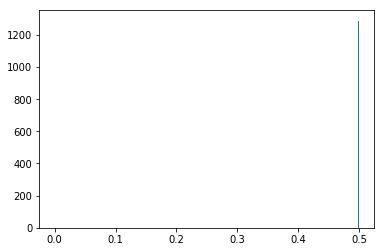

In [13]:
#plt.plot(data.p_exp, data.prob_exp, "b.", alpha=1)
plt.hist(data.prob_exp[~np.isnan(data.prob_exp)], bins=500);

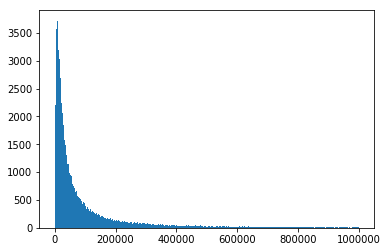

In [7]:
plt.hist(data["DCHISQ_EXP"], bins=np.linspace(0,1000000,500));

In [205]:
def predict(input_names, target_name, func=ML.Regressors.RFregressor):
    t0 = time.time()
    inputs, target = data[input_names], data[target_name]
    reg = ML.Regressors(inputs, target)
    prediction, truth = func(reg)
    print(f"Running {func.__name__} took {time.time()-t0} seconds")
    return prediction, truth

In [206]:
input_names = ["gmag", "rmag", "zmag", "w1mag", "w2mag"]
input_names = ["gminr", "rminz", "zminw1", "w1minw2", "gmag"]
target_name = "redshift"

In [207]:
funcs = [ML.Regressors.RFregressor, ML.Regressors.KNNregressor, ML.Regressors.KNN_dregressor]
results = [predict(input_names, target_name, func) for func in funcs]

/home/alan/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alan/mega/AstroTechniques/margaret/notebooks/MachineLearning.py:56: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  self._scaled_X = scaler.transform(self._X)


Running RFregressor took 15.235649108886719 seconds


/home/alan/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alan/mega/AstroTechniques/margaret/notebooks/MachineLearning.py:56: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  self._scaled_X = scaler.transform(self._X)


Running KNNregressor took 0.8328409194946289 seconds


/home/alan/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alan/mega/AstroTechniques/margaret/notebooks/MachineLearning.py:56: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  self._scaled_X = scaler.transform(self._X)
/home/alan/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alan/mega/AstroTechniques/margaret/notebooks/MachineLearning.py:187: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  self._scaled_Xtrain = scaler.transform(self._Xtrain)
/home/alan/mega/AstroTechniques/margaret/notebooks/MachineLearning.py:188: DataConversionWarning: D

Running KNN_dregressor took 0.9096143245697021 seconds


In [191]:
from imp import reload
reload(MLA)

<module 'MLAnalysis' from '/home/alan/mega/AstroTechniques/margaret/notebooks/MLAnalysis.py'>

In [192]:
f(np.linspace(0,1,20))

array([1.        , 1.05263158, 1.10526316, 1.15789474, 1.21052632,
       1.26315789, 1.31578947, 1.36842105, 1.42105263, 1.47368421,
       1.52631579, 1.57894737, 1.63157895, 1.68421053, 1.73684211,
       1.78947368, 1.84210526, 1.89473684, 1.94736842, 2.        ])

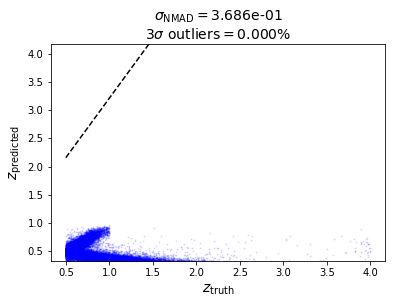

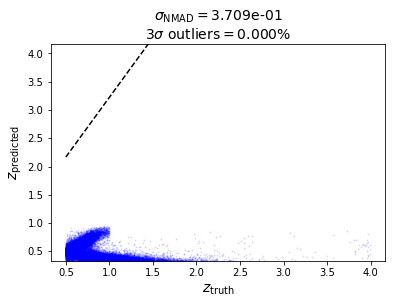

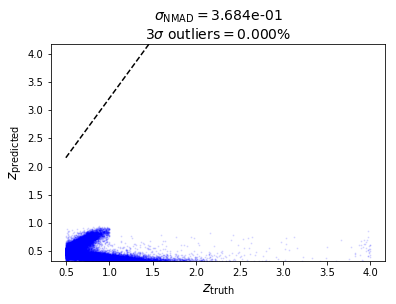

In [194]:
def f(z):
    ans = z.copy()
    ans[z < 0.5] = (1 - z[z < 0.5])**3/(1-.5)**3*.5
    return 1+z
f_label = lambda target: f"(1 + {target})"
target_label = "z"
for result in results:
    analysis = MLA.RegressionAnalyzer(*result, scale_as=f)
    plt.figure()
    analysis.plot_residuals(target_label, f_label, res=False)

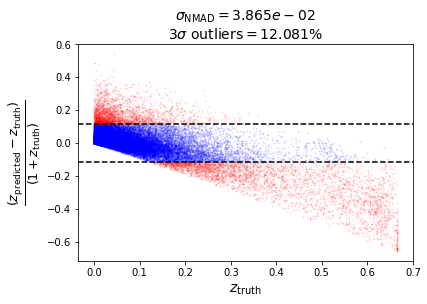

In [107]:
f = lambda z: 1#z + 1  # optional
analysis = MLA.RegressionAnalyzer(prediction, truth, scale_as=f)

target_label = "z"  # optional
f_label = lambda target: f"(1 + {target})"  # optional
analysis.plot_residuals(target_label=target_label, f_label=f_label, alpha=.1);

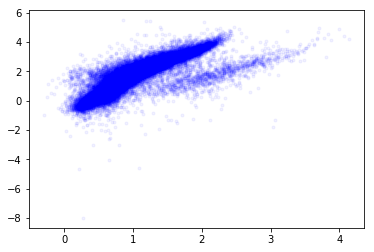

In [209]:
plt.plot(data["rmag"]-data["zmag"], data["rmag"]-data["w1mag"], "b.", alpha=.05)

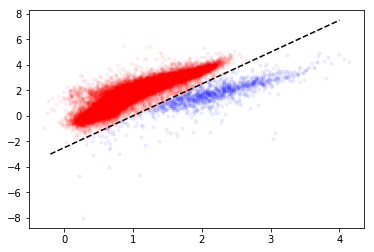

In [75]:
def plot_line(m,b):
    x = np.linspace(-.2,4)
    y = m*x + b
    plt.plot(x,y,"k--")
x,y = data["rmag"]-data["zmag"], data["rmag"]-data["w1mag"]
is_star = y < 2.5 * x - 2.5
plt.plot(x[is_star],y[is_star], "b.", alpha=.05)
plt.plot(x[~is_star],y[~is_star], "r.", alpha=.05)
plot_line(2.5,-2.5)


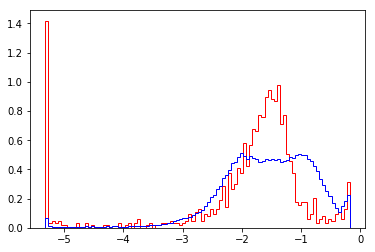

In [78]:
plt.hist(np.log10(data["b1000"][is_star]), bins=100, histtype="step", density=True, color="red")
plt.hist(np.log10(data["b1000"][~is_star]), bins=100, histtype="step", density=True, color="blue");

In [74]:
np.sum(is_star), np.sum(~is_star)

(96770, 1235)

In [56]:
z_predict_rf, z_true_rf = random_forest(input_names, target_name)

/home/alan/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alan/mega/AstroTechniques/margaret/notebooks/MachineLearning.py:56: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  self._scaled_X = scaler.transform(self._X)


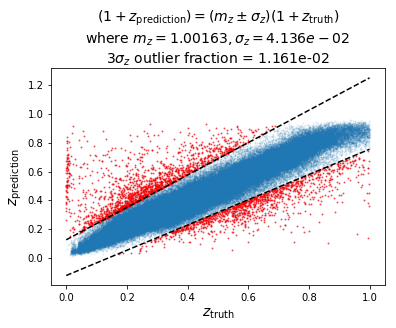

In [87]:
scatter_target(z_predict_rf, z_true_rf)

In [22]:
input_names = ["gmag", "gminr", "rminz", "zminw1", "w1minw2"]
z_predict, z_true = random_forest(input_names, target_name)

/home/alan/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/alan/mega/AstroTechniques/margaret/notebooks/MachineLearning.py:56: DataConversionWarning: Data with input dtype float32 were all converted to float64 by StandardScaler.
  self._scaled_X = scaler.transform(self._X)


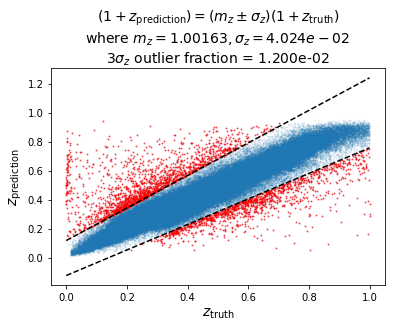

In [88]:
scatter_target(z_predict, z_true)